Project 1 - Classpass data analysis

In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')


#read in the csv file
df = pd.read_csv('thursday_classpass.csv',encoding = 'unicode_escape')
df.sample(10)

,Title,Instructor,Rating,Reviews,Time,Duration,Venue,Location,Tags,Price
252,Mat Pilates Plus,Sam Hay,4.6,12120,6:00 pm,60,Pilates on Fifth,Midtown East,"Flexibility, Balance, Core, Abs, Pilates",7
615,Adult: Int./Adv. Contemporary,Ambika *Raina,4.8,5590,7:00 pm,90,Mark Morris Dance Center,Fort Greene,"Cardio, Flexibility, Balance, Dance",10
418,Natal Yoga,kathryn Cornelius,4.8,3492,6:30 pm,75,Shambhala Yoga & Dance Center,Prospect Heights,"Prenatal, Flexibility, Balance, Arms, Yoga, Pi...",6
985,Bikram Express (60 min),Maura Duignan,4.7,843,7:30 pm,60,Balance Yoga & Wellness,Larchmont,"Flexibility, Balance, Arms, Yoga",4
299,Kickboxing,Mario Marin,4.9,1149,6:00 pm,60,Red Planet Muay Thai,Bedford-Stuyvesant,"Cardio, Arms, Boxing",4
525,Hot Power Vinyasa,Danielle Pagliuca,4.9,7457,6:45 pm,75,Powerflow Yoga,Hoboken,Yoga,5
1202,Kickboxing,Jonas Filho,none,none,8:30 pm,60,Traditional Karate of Newark,Newark,"Cardio, Arms, Boxing",2
279,HIIT CORE AND CARDIO DEVELOPMENT,HIIT INSTRUCTOR,4.6,140,6:00 pm,60,The JC HIIT Club,Jersey City,Strength Training,6
273,Barre Bootcamp,Michelle W,4.7,7083,6:00 pm,30,Crunch Gym,Park Slope,"Flexibility, Balance, Core, Abs, Barre",5
1098,Karate (Women Only),none,none,none,8:00 pm,60,Warren Levi Martial Arts & Fitness,Cedarhurst,Martial Arts,4


In [76]:
df.corr()

,Duration,Price
Duration,1.000000,-0.206172
Price,-0.206172,1.000000


In [77]:
df.dtypes

Title         object
Instructor    object
Rating        object
Reviews       object
Time          object
Duration       int64
Venue         object
Location      object
Tags          object
Price          int64
dtype: object

In [78]:
df.columns = df.columns.str.lower() #put all headers to lower case for ease of manipulation 
df.head(10)

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Brazilian Jiu-Jitsu -- Fundamentals,Jin Yung,4.7,4090,5:30 pm,60,Five Points Academy,SoHo,Martial Arts,10
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
2,RIHANNA VS. GAGA,KY,4.8,27519,5:30 pm,45,The Monster Cycle,SoHo,NaN,9
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,"Flexibility, Balance, Arms, Yoga",8
4,Drive Strength & Fitness,Kelleigh Ryan,4.7,2166,5:30 pm,45,Drive 495,SoHo,"Cycling, Strength Training",11
5,Boxing - All Levels,Kenny Ocean,4.7,2821,5:30 pm,60,Church St Boxing,Tribeca,"Cardio, Arms, Boxing",9
6,SKY TING Yin Yoga,Patrick Foley,4.8,17354,5:30 pm,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
7,All Levels Vinyasa,Jason Orrell,4.7,511,5:30 pm,60,ALO Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",6
8,LAND TONING | Butt / Legs - Coed,JC Durimel,4.8,11325,5:30 pm,45,AQUA Studio NY,Tribeca,Strength Training,12
9,WundaBar Workout,Kristina Brookman,4.8,19778,5:30 pm,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",18


In [79]:
df = df[~df['instructor'].str.contains("none")] #removes any row which has 'none' in the instructor column 

In [80]:
df = df[~df['rating'].str.contains("none")] #removes any row which has 'none' in the rating column 

In [81]:
df = df[~df['reviews'].str.contains("none")] #removes any row which has 'none' in the reviews column 

In [82]:
(df == "none").any() #check for any none values

title         False
instructor    False
rating        False
reviews       False
time          False
duration      False
venue         False
location      False
tags          False
price         False
dtype: bool

In [83]:
df.dropna(inplace = True) #drop all NaN's

In [84]:
df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Brazilian Jiu-Jitsu -- Fundamentals,Jin Yung,4.7,4090,5:30 pm,60,Five Points Academy,SoHo,Martial Arts,10
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,"Flexibility, Balance, Arms, Yoga",8
4,Drive Strength & Fitness,Kelleigh Ryan,4.7,2166,5:30 pm,45,Drive 495,SoHo,"Cycling, Strength Training",11
5,Boxing - All Levels,Kenny Ocean,4.7,2821,5:30 pm,60,Church St Boxing,Tribeca,"Cardio, Arms, Boxing",9
6,SKY TING Yin Yoga,Patrick Foley,4.8,17354,5:30 pm,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
7,All Levels Vinyasa,Jason Orrell,4.7,511,5:30 pm,60,ALO Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",6
8,LAND TONING | Butt / Legs - Coed,JC Durimel,4.8,11325,5:30 pm,45,AQUA Studio NY,Tribeca,Strength Training,12
9,WundaBar Workout,Kristina Brookman,4.8,19778,5:30 pm,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",18
10,modelFIT Sculpt,Abbey Woodfin,4.8,12877,5:30 pm,60,modelFIT,NoLita,"Cardio, Strength Training",9


In [85]:
df.isnull().sum().sum() #double check

0

In [86]:
df.dtypes

title         object
instructor    object
rating        object
reviews       object
time          object
duration       int64
venue         object
location      object
tags          object
price          int64
dtype: object

In [87]:
df["rating"]=df["rating"].astype(float) #change type

In [88]:
df["reviews"]=df["reviews"].astype(int) #change type

In [89]:
df.dtypes

title          object
instructor     object
rating        float64
reviews         int64
time           object
duration        int64
venue          object
location       object
tags           object
price           int64
dtype: object

In [90]:
df.corr()

,rating,reviews,duration,price
rating,1.000000,0.219084,0.001365,0.240685
reviews,0.219084,1.000000,-0.180801,0.543128
duration,0.001365,-0.180801,1.000000,-0.204761
price,0.240685,0.543128,-0.204761,1.000000


In [171]:
df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Brazilian Jiu-Jitsu -- Fundamentals,Jin Yung,4.7,4090,5:30 pm,60,Five Points Academy,SoHo,Martial Arts,10
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,"Flexibility, Balance, Arms, Yoga",8
4,Drive Strength & Fitness,Kelleigh Ryan,4.7,2166,5:30 pm,45,Drive 495,SoHo,"Cycling, Strength Training",11
5,Boxing - All Levels,Kenny Ocean,4.7,2821,5:30 pm,60,Church St Boxing,Tribeca,"Cardio, Arms, Boxing",9
6,SKY TING Yin Yoga,Patrick Foley,4.8,17354,5:30 pm,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
7,All Levels Vinyasa,Jason Orrell,4.7,511,5:30 pm,60,ALO Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",6
8,LAND TONING | Butt / Legs - Coed,JC Durimel,4.8,11325,5:30 pm,45,AQUA Studio NY,Tribeca,Strength Training,12
9,WundaBar Workout,Kristina Brookman,4.8,19778,5:30 pm,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",18
10,modelFIT Sculpt,Abbey Woodfin,4.8,12877,5:30 pm,60,modelFIT,NoLita,"Cardio, Strength Training",9


In [155]:
#in this cell we want to group by location and analyse the effect of location on the price and the rating
location = df.groupby('location').agg('count') #grouping by location and taking the count
loc_lis = location[location['title'] > 20].index.tolist() #making a list where all of the title column is greater than 10
loc_lis

['Chelsea',
 'Financial District',
 'Flatiron',
 'Greenwich Village',
 'Hoboken',
 'Jersey City',
 'Midtown',
 'Midtown East',
 'NoHo',
 'SoHo',
 'Tribeca',
 'Union Square',
 'Upper East Side',
 'Upper West Side',
 'Williamsburg']

In [156]:
filt_df = df[df['location'].isin(loc_lis)] #filter the dataframe for locations with more than 10 gyms 
filt_df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Brazilian Jiu-Jitsu -- Fundamentals,Jin Yung,4.7,4090,5:30 pm,60,Five Points Academy,SoHo,Martial Arts,10
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,"Flexibility, Balance, Arms, Yoga",8
4,Drive Strength & Fitness,Kelleigh Ryan,4.7,2166,5:30 pm,45,Drive 495,SoHo,"Cycling, Strength Training",11
5,Boxing - All Levels,Kenny Ocean,4.7,2821,5:30 pm,60,Church St Boxing,Tribeca,"Cardio, Arms, Boxing",9
6,SKY TING Yin Yoga,Patrick Foley,4.8,17354,5:30 pm,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
7,All Levels Vinyasa,Jason Orrell,4.7,511,5:30 pm,60,ALO Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",6
8,LAND TONING | Butt / Legs - Coed,JC Durimel,4.8,11325,5:30 pm,45,AQUA Studio NY,Tribeca,Strength Training,12
9,WundaBar Workout,Kristina Brookman,4.8,19778,5:30 pm,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",18
11,Bounce,Shaina McGregor,4.8,6397,5:30 pm,50,FitHouse,Tribeca,"Pilates, Strength Training",7


In [225]:
loc_price = filt_df.groupby('location').mean()['price'] #mean price per location 
loc_reviews = filt_df.groupby('location').mean()['reviews'] #reviews against location
loc_rating = filt_df.groupby('location').mean()['rating'] #rating against location
loc_rating

location
Chelsea               4.805263
Financial District    4.776190
Flatiron              4.794286
Greenwich Village     4.754545
Hoboken               4.802564
Jersey City           4.736111
Midtown               4.803846
Midtown East          4.720455
NoHo                  4.814286
SoHo                  4.760870
Tribeca               4.794118
Union Square          4.778261
Upper East Side       4.792308
Upper West Side       4.721569
Williamsburg          4.847170
Name: rating, dtype: float64

In [158]:
type(loc_price)

pandas.core.series.Series

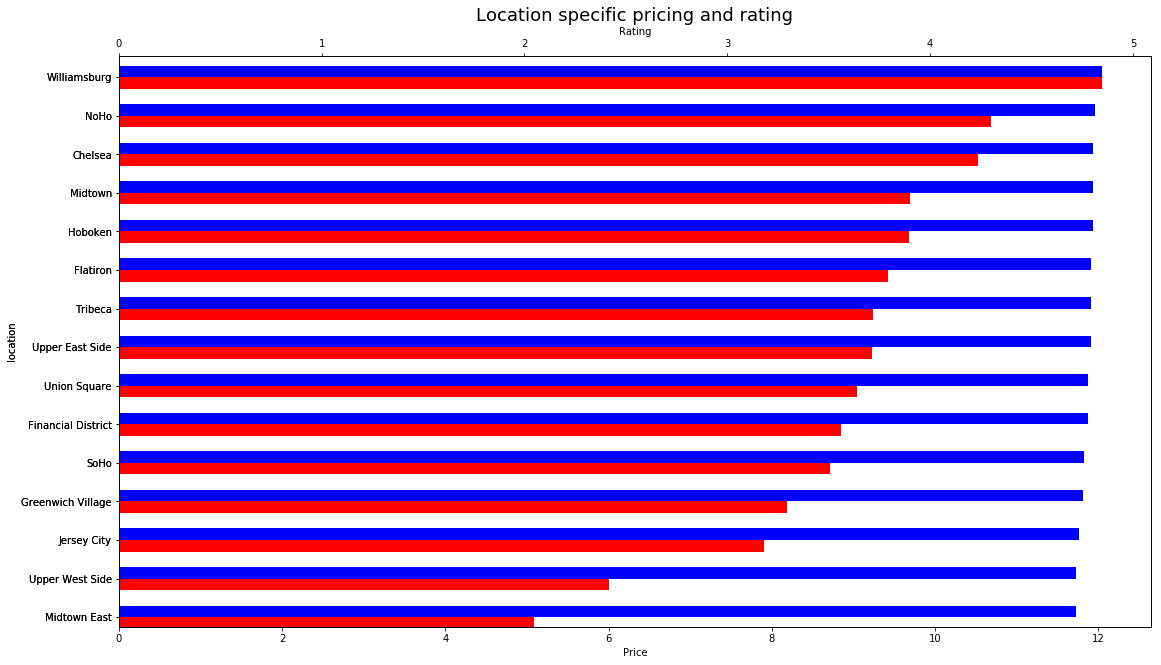

In [244]:
# loc_price.sort_values(ascending=True).plot(kind='barh', color="#264bec")
# loc_rating.sort_values(ascending=True).plot(kind='barh', color="r")



fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(18.5, 10.5)


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

loc_price.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position=1)
loc_rating.sort_values(ascending=True).plot(kind='barh', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('Price')
ax2.set_xlabel('Rating')
plt.title('Location specific pricing and rating', fontsize=18)
plt.show()

# plt.xlabel('Price in credits')
# plt.ylabel('Location')
#plt.title('Location specific pricing', fontsize=18)

In [183]:
df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Brazilian Jiu-Jitsu -- Fundamentals,Jin Yung,4.7,4090,5:30 pm,60,Five Points Academy,SoHo,Martial Arts,10
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,"Flexibility, Balance, Arms, Yoga",8
4,Drive Strength & Fitness,Kelleigh Ryan,4.7,2166,5:30 pm,45,Drive 495,SoHo,"Cycling, Strength Training",11
5,Boxing - All Levels,Kenny Ocean,4.7,2821,5:30 pm,60,Church St Boxing,Tribeca,"Cardio, Arms, Boxing",9
6,SKY TING Yin Yoga,Patrick Foley,4.8,17354,5:30 pm,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
7,All Levels Vinyasa,Jason Orrell,4.7,511,5:30 pm,60,ALO Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",6
8,LAND TONING | Butt / Legs - Coed,JC Durimel,4.8,11325,5:30 pm,45,AQUA Studio NY,Tribeca,Strength Training,12
9,WundaBar Workout,Kristina Brookman,4.8,19778,5:30 pm,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",18
10,modelFIT Sculpt,Abbey Woodfin,4.8,12877,5:30 pm,60,modelFIT,NoLita,"Cardio, Strength Training",9


In [186]:
def tidy_split(df, column, sep=',', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df
tag_split_df = tidy_split(df,'tags')
tag_split_df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Brazilian Jiu-Jitsu -- Fundamentals,Jin Yung,4.7,4090,5:30 pm,60,Five Points Academy,SoHo,Martial Arts,10
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,Flexibility,25
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,Balance,25
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,Core,25
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,Abs,25
1,Pilates Reformer: Sculpt + Restore,Adriana Ballester,4.9,26154,5:30 pm,50,New York Pilates,SoHo,Pilates,25
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,Flexibility,8
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,Balance,8
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,Arms,8
3,Yoga SculptWorks w/ Music,Irina Ovsiannikova,4.6,10944,5:30 pm,45,YogaWorks,SoHo,Yoga,8


In [202]:
genre_list = ["Cycling" ,"Yoga", "Pilates","Boxing","Dance","Martial Arts"]
genres = tag_split_df[(tag_split_df['tags'].isin(genre_list))]
genre_reviews = genres.groupby('tags').mean()['reviews'] #check to see how different types of class vary with time, no reviews and price
genre_price = genres.groupby('tags').mean()['price']
genre_durat = genres.groupby('tags').mean()['duration']
genre_price


tags
Boxing          7.142857
Cycling         5.500000
Dance           5.333333
Martial Arts    7.882353
Pilates         9.409091
Yoga            5.562500
Name: price, dtype: float64

Text(0.5, 1.0, 'Genre specific pricing')

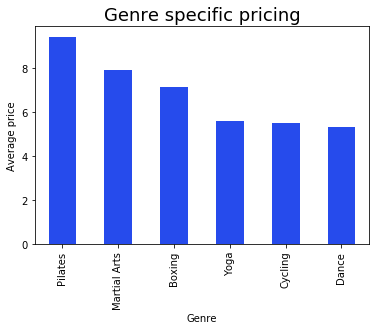

In [203]:
genre_price.sort_values(ascending=False).plot(kind='bar', color="#264bec")
plt.xlabel('Genre')
plt.ylabel('Average price')
plt.title('Genre specific pricing', fontsize=18)

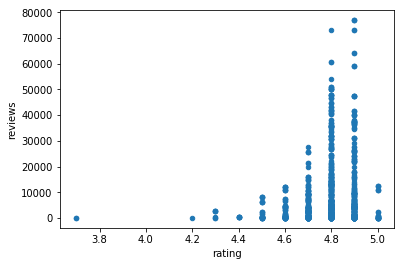

In [231]:
test = df[['rating','reviews']] #attempt to observe the relationship between class price and its rating
test.plot.scatter('rating','reviews')